In [8]:
# import libraries for ProjectGurukul Credit Card Fraud Detection Project using Machine Learning:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report


In [ ]:
# Creating Model:
model = LogisticRegression()
# training the Logistic Regression model with training data:
model.fit(X_train,Y_train)
# Model Evaluation
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, Y_train)
print('Accuracy of Training data:', training_data_accuracy)


Accuracy of Training data: 0.9542566709021602


c:\Users\japal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
# classification report of the model on training data:
print(classification_report(X_train_pred, Y_train))
# accuracy on test data:
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)
print('Accuracy of Testing data:', test_data_accuracy)
# confusion matrix and classification report of test data:
print(confusion_matrix(X_test_pred, Y_test))
print(classification_report(X_test_pred, Y_test))#Loading the dataset to a Pandas Dataframe



              precision    recall  f1-score   support

           0       0.98      0.93      0.96       411
           1       0.93      0.98      0.95       376

    accuracy                           0.95       787
   macro avg       0.95      0.96      0.95       787
weighted avg       0.96      0.95      0.95       787

Accuracy of Testing data: 0.9187817258883249
[[91  8]
 [ 8 90]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        99
           1       0.92      0.92      0.92        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



In [ ]:
credit_card_data = pd.read_csv('C:/Users/japal/OneDrive/Desktop/creditcard.csv')
# let's see first 5 rows of the dataset:
credit_card_data.head(5)
# let's see last 5 rows of our dataset: 
credit_card_data.tail() 
# dataset information: 
credit_card_data.info() 
# checking number of missing values:
credit_card_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Find distribution of Normal transaction or Fraud transaction:
credit_card_data['Class'].value_counts()
# Separating the data:
normal = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]
# check shape
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


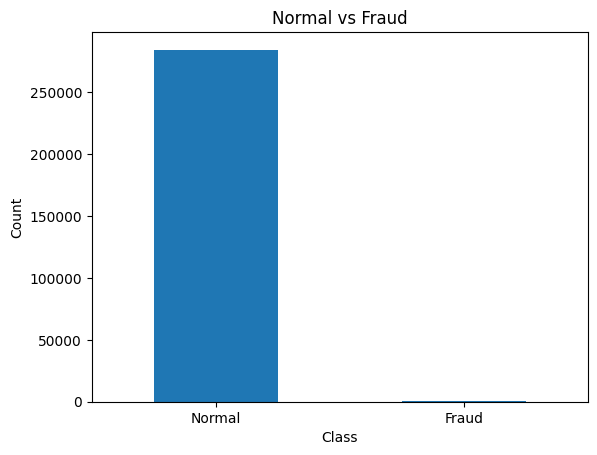

In [ ]:
#visualize the data:
labels = ["Normal", "Fraud"]
count_classes = credit_card_data.value_counts(credit_card_data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Normal vs Fraud")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

(984, 30) (787, 30) (197, 30)


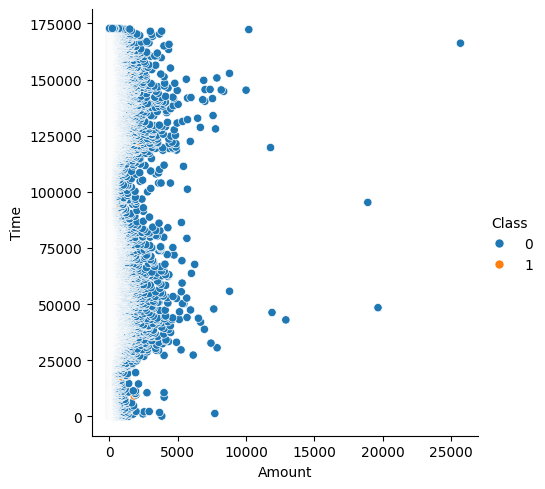

In [15]:
# statistical measures of the data:
normal.Amount.describe()
fraud.Amount.describe()

# visualize the data using seaborn:
sns.relplot(x = 'Amount' , y = 'Time' , hue = 'Class', data = credit_card_data)
# Compare values of both transactions:
credit_card_data.groupby('Class').mean()

# Now we will build a sample dataset containing similar distribution of normal transaction and fraud transaction:
normal_sample = normal.sample(n=492)
# Concat two data ( normal_sample and fraud) to create new dataframe which consist equal number of fraud transactions and normal transactions, In this way we balance our dataset (As our dataset is highly unbalanced initially) :
credit_card_new_data = pd.concat([normal_sample, fraud], axis=0)
# Let’s see our new dataset:
credit_card_new_data

# Analyse our new dataset:
credit_card_new_data['Class'].value_counts()
# Splitting data into features and targets
X = credit_card_new_data.drop('Class', axis=1)
Y = credit_card_new_data['Class']

# splitting the data into training and testing data:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state= 2)
print(X.shape, X_train.shape, X_test.shape)